In [81]:
#imports here
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


Exercise 2:
First we upload the dataset .csv into a pandas dataframe
Our dataset countains a list of players with associated data from https://achievementstats.com/index.php, an leatherboard ranking player achievement scores from Steam. Below, we show achievement scores such as Steam Points or number of 100% completed Games for the top 200000 players on steam.

In [3]:
# ex 2 a) b)
pd.set_option("display.max_columns", None)
leatherboard=  pd.read_csv("data/amended_first_200k_players.csv")
leatherboard.drop(labels="Unnamed: 0", axis=1,inplace=True) #drop duplicate index column
leatherboard

/var/folders/n7/s8tc8j7j3rg2lyy4vmqxjvk40000gn/T/ipykernel_2001/4226051518.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  leatherboard=  pd.read_csv("data/amended_first_200k_players.csv")


,Rank,Player Id,Player Name,Best achievements,Points,#,Games,100%,All,Badges,XP,Member since,Hours,Last update
0,1,The Stranger,The Stranger,Blessing of the Flame Requiescat Memory Awak...,132759.30,153732,16755,4493,21203.0,4910,3087192,04/15/2011,75591.8,05/26/2022 11:41:05
1,2,lylat,lylat,"Death from Above Apex Predator Waste Not, Wa...",119588.95,141645,18358,6034,28377.0,195,296822,06/03/2009,55960.7,05/26/2022 11:42:01
2,3,hannez,hannez,Legendary Heckler Legendary Storm Legendary ...,96014.25,98255,13651,4008,23981.0,2009,792032,06/23/2010,33020.0,05/26/2022 11:40:54
3,4,DDtective,DDtective,Escaping Outlands A Duneman's Promise Elite ...,89515.41,101757,12070,3708,19821.0,196,60662,09/01/2005,9352.9,07/22/2022 23:39:26
4,5,Skaery,Skaery,World of Easy Goo World of Okay Goo World of...,88175.83,95676,10338,2127,13092.0,645,198956,06/08/2004,89602.9,05/26/2022 11:38:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200005,200006,76561198085421589,Brandenburg800,['1v1 Ranked (all I got was stomped and this l...,467.61,642,112,1,170.0,12,1852,03/03/2013,1544.3,06/05/2022 19:40:30
200006,200007,76561198403437459,bounce01,['Who Need A Mechanic? (Besiege – 1.92 points)...,467.61,857,102,2,131.0,7,783,07/11/2017,2750.9,06/06/2022 20:56:55
200007,200008,76561198015047677,awake,"[""I'm Flying! (Drake Hollow – 2.00 points)"", '...",467.61,908,190,1,256.0,125,31466,11/01/2009,0.0,05/21/2022 23:19:50
200008,200009,76561198832353988,depressed fearless,"['Welcome to Arid (Unturned – 2.15 points)', '...",467.60,767,60,0,43.0,8,4946,04/25/2018,1512.8,04/24/2022 10:35:30


Next we create a scatterplot showing the correlation between number of owned Games and Games which have been 100% completed.Steam points (a player gains 100 steam points for every 1 $ spent on the steam store) are additionally added via a color mapping, where yellow indicates the highest possible value and dark blue the lowest. This will give us an intuition on whether players who spend much money on the steam store also tend to finish their games completely.

Correlation coefficient between number of games and number of games completed to 100 is 0.33802698826936517


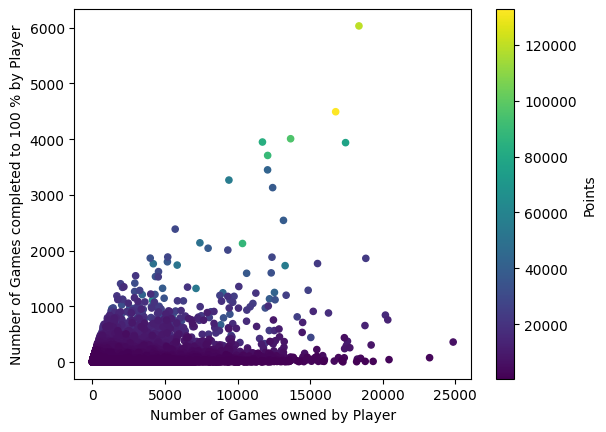

In [4]:
# Exercise 2 c)
corr_plot=leatherboard.plot.scatter(x="Games",y="100%",c="Points",colormap="viridis",sharex=False)
corr_plot.set_xlabel("Number of Games owned by Player")
corr_plot.set_ylabel("Number of Games completed to 100 % by Player")
corr = np.corrcoef(leatherboard["Games"],leatherboard["100%"])
print(f"Correlation coefficient between number of games and number of games completed to 100 is {corr[0][1]}")

As we can see, most players have less than 40000 which equates to spending less than 400$ in the steam store. Additionally, most players own less than 10000 Games and most players completed less than 1000 Games to 100%. 

In [55]:
# Deeper look at the Top 100
top100_games = leatherboard.sort_values("Games", ascending=False).loc[leatherboard['Rank'] <= 100, ['Rank', 'Points', 'Games']].reset_index(drop=True)
top100_100p = leatherboard.sort_values("100%", ascending=False).iloc[:100, [0, 4, 7]].reset_index(drop=True)

Text(0, 0.5, 'Number of Games owned')

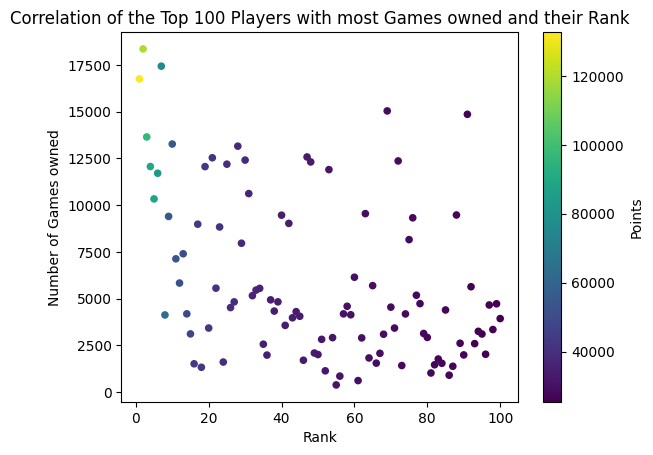

In [65]:
top100_games_plot = top100_games.plot.scatter(x='Rank', y='Games', color='Points')
top100_games_plot.set_title("Correlation of the Top 100 Players with most Games owned and their Rank")
top100_games_plot.set_xlabel("Rank")
top100_games_plot.set_ylabel("Number of Games owned")

Text(0, 0.5, 'Number of Games completed to 100%')

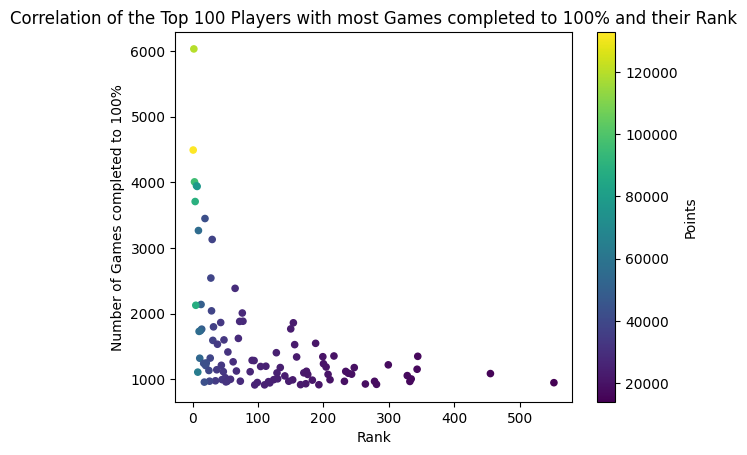

In [66]:

top100_100p_plot = top100_100p.plot.scatter(x='Rank', y='100%', color='Points')
top100_100p_plot.set_title("Correlation of the Top 100 Players with most Games completed to 100% and their Rank")
top100_100p_plot.set_xlabel("Rank")
top100_100p_plot.set_ylabel("Number of Games completed to 100%")

In [91]:
# only look at the top 100 with ordering of rank
top100_rank = leatherboard.iloc[:100]

Text(0, 0.5, 'Occurances')

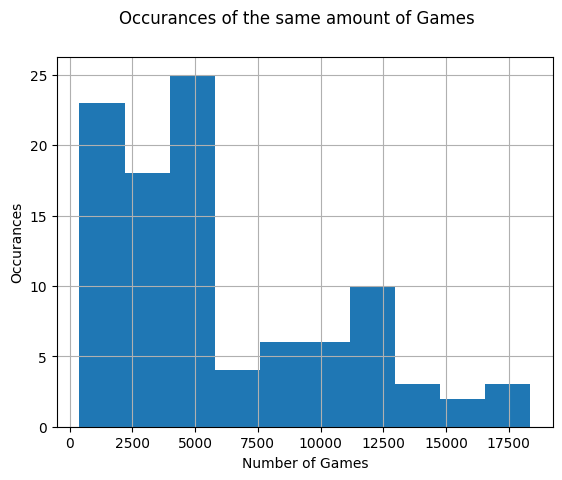

In [92]:
top100_rank['Games'].hist()
plt.suptitle('Occurances of the same amount of Games')
plt.xlabel('Number of Games')
plt.ylabel('Occurances')

Text(0, 0.5, 'Occurances')

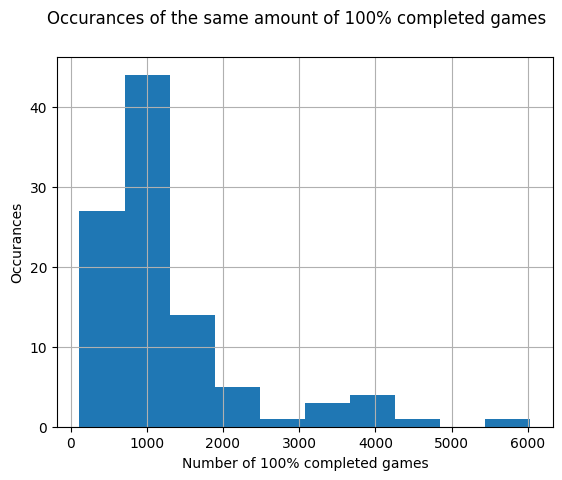

In [93]:
top100_rank['100%'].hist()
plt.suptitle('Occurances of the same amount of 100% completed games')
plt.xlabel('Number of 100% completed games')
plt.ylabel('Occurances')

Exercise 2 d)

Some data was missing in the dataset, such as and explanation for the column called "#" and "All". For the other columns, domain knowledge about the steam ecosystem is required to understand them. With this knowledge, the columns are aptly named to be understood.